<a href="https://colab.research.google.com/github/koushik7074/Hyperparameter-Optimization-in-ANN/blob/main/imbalance_data_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('customer_churn.xls')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.drop('customerID',axis='columns', inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
df.TotalCharges.values #these values are strings

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [5]:
df.MonthlyCharges.values # float

array([ 29.85,  56.95,  53.85, ...,  29.6 ,  74.4 , 105.65])

In [6]:
# convert string values to numeric
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [7]:
df[pd.to_numeric(df.TotalCharges, errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
# create new dataframe by removing these rows
df1 = df[df.TotalCharges!=" "]
df1.shape

(7032, 20)

In [9]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

<ipython-input-9-b67e0c3d31a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [10]:
df1.TotalCharges.dtypes

dtype('float64')

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

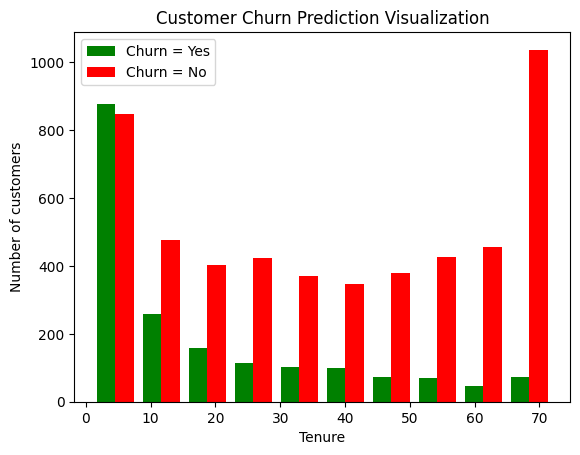

In [11]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no],
         color=['green','red'],
         label = ['Churn = Yes','Churn = No']);

plt.legend()
plt.xlabel('Tenure')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

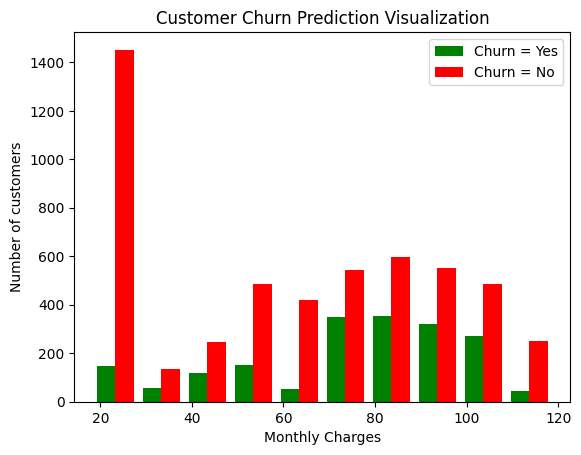

In [12]:
tenure_churn_no = df1[df1.Churn=='No'].MonthlyCharges
tenure_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.hist([tenure_churn_yes, tenure_churn_no],
         color=['green','red'],
         label = ['Churn = Yes','Churn = No']);

plt.legend()
plt.xlabel('Monthly Charges')
plt.ylabel('Number of customers')
plt.title('Customer Churn Prediction Visualization')

In [13]:
def print_unique_col_values(dataframe):
    for columns in df:
        if df[columns].dtypes == 'object':
            print(f'{columns} : {df[columns].unique()}')

In [14]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


In [15]:
df1.replace('No internet service','No', inplace = True)

df1.replace('No phone service','No', inplace = True)

<ipython-input-15-e77a2f32705f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No', inplace = True)
<ipython-input-15-e77a2f32705f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No', inplace = True)


In [16]:
print_unique_col_values(df1)

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges : ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn : ['No' 'Yes']


### Label Encoding (replace 'yes'/'no' with 1/0)

In [17]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines',
              'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
               'StreamingTV','StreamingMovies','PaperlessBilling','Churn']

for col in yes_no_cols:
    df1[col].replace({'Yes':1, 'No':0}, inplace=True)


<ipython-input-17-6c48bc695e27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[col].replace({'Yes':1, 'No':0}, inplace=True)


In [18]:
for col in df1:
    print(f'{col}:{df1[col].unique()}')

gender:['Female' 'Male']
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:[0 1]
MultipleLines:[0 1]
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
StreamingTV:[0 1]
StreamingMovies:[0 1]
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:[1 0]
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:[  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn:[0 1]


In [19]:
df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)

<ipython-input-19-0d55a7e00b11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['gender'].replace({'Female':1, 'Male':0}, inplace = True)


In [20]:
df1.gender.unique()

array([1, 0])

### One hot encoding

In [21]:
df2 = pd.get_dummies(data = df1, columns = ['InternetService', 'Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [22]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [23]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

### Scale the data

In [24]:
cols_to_scale = ['tenure', 'MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [25]:
df2.sample(1)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5737,0,0,1,1,0.239437,1,0,1,0,1,...,1,0,0,1,0,0,0,0,1,0


## Split the data

In [26]:
X = df2.drop('Churn', axis = 'columns')
y=df2['Churn']

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [28]:
X_train.shape, X_test.shape

((5625, 26), (1407, 26))

In [29]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import classification_report,confusion_matrix

def ANN(X_train, y_train, X_test, y_test, loss, weights):
  model = keras.Sequential([
        keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
        keras.layers.Dense(15, activation = 'relu'),
        keras.layers.Dense(1, activation = 'sigmoid')
  ])

  model.compile(
        optimizer = 'adam',
        loss = 'binary_crossentropy',
        metrics = ['accuracy']
  )
  if weights==-1:
    model.fit(X_train, y_train, epochs=100)
  else:
    model.fit(X_train, y_train, epochs=100, class_weights=weights)

  print(model.evaluate(X_test, y_test))

  y_pred=model.predict(X_test)
  y_pred=np.round(y_pred)

  print('Classification report:\n', classification_report(y_test, y_pred))

  return y_pred

In [30]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 5s 7ms/step - loss: 0.5644 - accuracy: 0.6978
Epoch 2/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4335 - accuracy: 0.7877
Epoch 3/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4205 - accuracy: 0.7956
Epoch 4/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4151 - accuracy: 0.8023
Epoch 5/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4121 - accuracy: 0.8053
Epoch 6/100
176/176 [==============================] - 1s 8ms/step - loss: 0.4100 - accuracy: 0.8025
Epoch 7/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4075 - accuracy: 0.8066
Epoch 8/100
176/176 [==============================] - 2s 9ms/step - loss: 0.4068 - accuracy: 0.8089
Epoch 9/100
176/176 [==============================] - 1s 6ms/step - loss: 0.4049 - accuracy: 0.8116
Epoch 10/100
176/176 [==============================] - 1s 7ms/step - loss: 0.4039 - accura

In [31]:
# # Model building using tensorflow
# import tensorflow as tf
# from tensorflow import keras

# model = keras.Sequential([
#         keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
#         keras.layers.Dense(15, activation = 'relu'),
#         keras.layers.Dense(1, activation = 'sigmoid')
# ])

# model.compile(
#         optimizer = 'adam',
#         loss = 'binary_crossentropy',
#         metrics = ['accuracy']
# )

# model.fit(X_train, y_train, epochs = 100)

In [32]:
# model.evaluate(X_test, y_test)

In [33]:
# y_predict = model.predict(X_test)


In [34]:
# y_predict

In [35]:
# y_pred = []

# for element in y_predict:
#   if element > 0.5:
#     y_pred.append(1)
#   else:
#     y_pred.append(0)

In [36]:
# y_pred[:5]

In [37]:
# y_test[:5]

In [38]:
# from sklearn.metrics import classification_report,confusion_matrix

# print(confusion_matrix(y_test, y_pred))

# print(classification_report(y_test, y_pred))

Text(50.722222222222214, 0.5, 'Prediction')

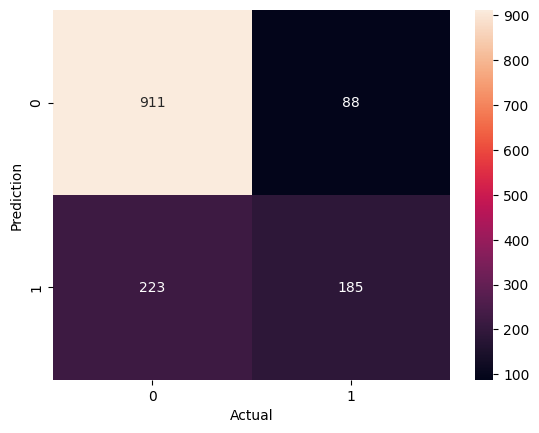

In [39]:
import seaborn as sns
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Actual')
plt.ylabel('Prediction')

# Undersampling

In [40]:
# class count
count_class_0, count_class_1 = df1.Churn.value_counts()

# Divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [41]:
df_class_0.shape

(5163, 27)

In [42]:
df_class_1.shape

(1869, 27)

In [43]:
df_class_0.sample(count_class_1).shape

(1869, 27)

In [44]:
df_class_0_under = df_class_0.sample(count_class_1)

In [45]:
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)
df_test_under.shape

(3738, 27)

In [46]:
df_test_under.Churn.value_counts()

0    1869
1    1869
Name: Churn, dtype: int64

In [47]:
X = df_test_under.drop('Churn', axis ='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=99,
                                                    stratify=y)

In [48]:
y_train.value_counts() #because of stratified sampling

0    1495
1    1495
Name: Churn, dtype: int64

In [49]:
# # Model building using tensorflow
# import tensorflow as tf
# from tensorflow import keras

# model = keras.Sequential([
#         keras.layers.Dense(20, input_shape = (26,), activation = 'relu'),
#         keras.layers.Dense(15, activation = 'relu'),
#         keras.layers.Dense(1, activation = 'sigmoid')
# ])

# model.compile(
#         optimizer = 'adam',
#         loss = 'binary_crossentropy',
#         metrics = ['accuracy']
# )

# model.fit(X_train, y_train, epochs = 100)

In [50]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6401 - accuracy: 0.6174
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5292 - accuracy: 0.7435
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5008 - accuracy: 0.7572
Epoch 4/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4905 - accuracy: 0.7605
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4830 - accuracy: 0.7632
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4784 - accuracy: 0.7719
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4757 - accuracy: 0.7729
Epoch 8/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4750 - accuracy: 0.7722
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4715 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4684 - accuracy: 0.7742
Epoch 11/

Text(50.722222222222214, 0.5, 'Prediction')

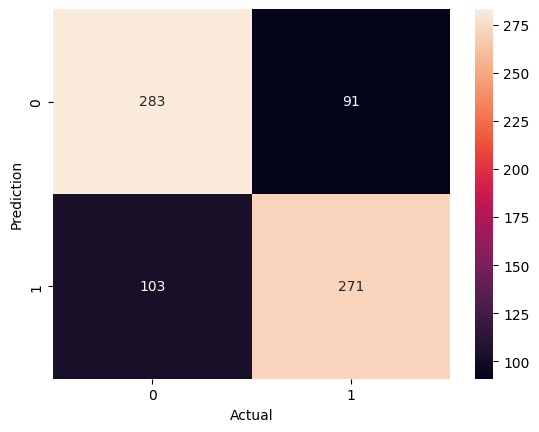

In [51]:
import seaborn as sns
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Actual')
plt.ylabel('Prediction')

# Oversampling

In [52]:
count_class_0, count_class_1

(5163, 1869)

In [53]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_class_1_over.shape

(5163, 27)

In [54]:
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)
df_test_over.shape

(10326, 27)

In [55]:
df_test_over.Churn.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [56]:
X = df_test_over.drop('Churn', axis ='columns')
y = df_test_over['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=99,
                                                    stratify=y)

In [57]:
y_train.value_counts() #because of stratified sampling

1    4130
0    4130
Name: Churn, dtype: int64

In [58]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [59]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 4ms/step - loss: 0.5510 - accuracy: 0.7308
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4992 - accuracy: 0.7561
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4913 - accuracy: 0.7590
Epoch 4/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4875 - accuracy: 0.7614
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4843 - accuracy: 0.7636
Epoch 6/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4816 - accuracy: 0.7662
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4798 - accuracy: 0.7668
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4778 - accuracy: 0.7684
Epoch 9/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.7715
Epoch 10/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4736 - accura

Text(50.722222222222214, 0.5, 'Prediction')

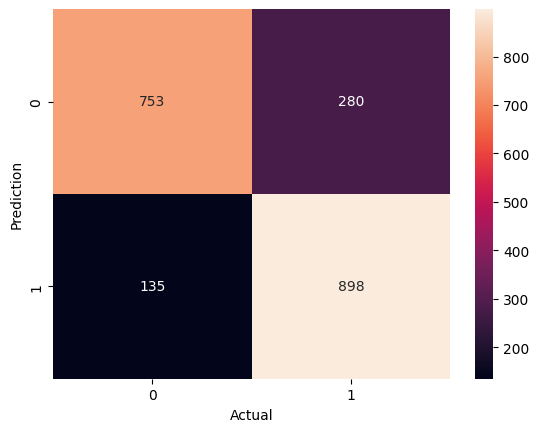

In [60]:
import seaborn as sns
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Actual')
plt.ylabel('Prediction')

# '**SMOTE**' method

In [61]:
X = df2.drop('Churn',axis='columns')
y = df2['Churn']

In [63]:
y.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [66]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts() #now y has equal samples

0    5163
1    5163
Name: Churn, dtype: int64

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X_sm,y_sm,test_size=0.2,
                                                    random_state=99,
                                                    stratify=y_sm)

In [68]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [69]:
y_test.value_counts()

1    1033
0    1033
Name: Churn, dtype: int64

In [70]:
y_pred = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
259/259 [==============================] - 2s 3ms/step - loss: 0.5412 - accuracy: 0.7354
Epoch 2/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4752 - accuracy: 0.7749
Epoch 3/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4650 - accuracy: 0.7778
Epoch 4/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4599 - accuracy: 0.7806
Epoch 5/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4552 - accuracy: 0.7834
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4535 - accuracy: 0.7840
Epoch 7/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4497 - accuracy: 0.7858
Epoch 8/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4471 - accuracy: 0.7890
Epoch 9/100
259/259 [==============================] - 1s 3ms/step - loss: 0.4441 - accuracy: 0.7903
Epoch 10/100
259/259 [==============================] - 1s 4ms/step - loss: 0.4424 - accura

Text(50.722222222222214, 0.5, 'Prediction')

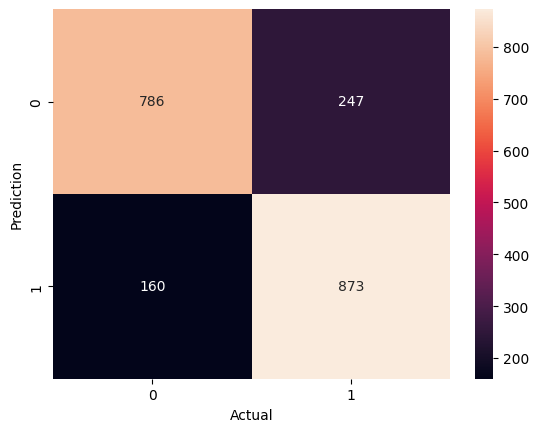

In [71]:
import seaborn as sns
cm= confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d');
plt.xlabel('Actual')
plt.ylabel('Prediction')

# Ensemble method with Undersampling

In [72]:
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [73]:
X=df2.drop('Churn', axis='columns')
y=df2['Churn']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,
                                                    random_state=99,
                                                    stratify=y)

In [75]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [76]:
df3=X_train.copy()
df3['Churn']=y_train

In [79]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [80]:
df3_class0.shape, df3_class1.shape

((4130, 27), (1495, 27))

In [86]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[:1495], df_minority], axis=0)

  X_train = df_train.drop(['Churn'], axis='columns')
  y_train = df_train['Churn']

  return X_train, y_train

In [87]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 0, 1495)

y_pred1 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 4ms/step - loss: 0.6175 - accuracy: 0.6773
Epoch 2/100
94/94 [==============================] - 0s 3ms/step - loss: 0.5219 - accuracy: 0.7512
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4941 - accuracy: 0.7672
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4864 - accuracy: 0.7706
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4788 - accuracy: 0.7719
Epoch 6/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4757 - accuracy: 0.7749
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7736
Epoch 8/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4731 - accuracy: 0.7716
Epoch 9/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7742
Epoch 10/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4682 - accuracy: 0.7793
Epoch 11/

In [88]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 1495, 2990)

y_pred2 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 2s 3ms/step - loss: 0.6466 - accuracy: 0.6124
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5113 - accuracy: 0.7622
Epoch 3/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4879 - accuracy: 0.7716
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4826 - accuracy: 0.7739
Epoch 5/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4791 - accuracy: 0.7726
Epoch 6/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4760 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4748 - accuracy: 0.7716
Epoch 8/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4741 - accuracy: 0.7672
Epoch 9/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4695 - accuracy: 0.7726
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4700 - accuracy: 0.7799
Epoch 11/

In [89]:
X_train, y_train = get_train_batch(df3_class0, df3_class1, 2990, 4130)

y_pred3 = ANN(X_train, y_train, X_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 0.6311 - accuracy: 0.6448
Epoch 2/100
94/94 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.7438
Epoch 3/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7555
Epoch 4/100
94/94 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7629
Epoch 5/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4862 - accuracy: 0.7592
Epoch 6/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4835 - accuracy: 0.7652
Epoch 7/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4795 - accuracy: 0.7635
Epoch 8/100
94/94 [==============================] - 1s 5ms/step - loss: 0.4771 - accuracy: 0.7682
Epoch 9/100
94/94 [==============================] - 0s 5ms/step - loss: 0.4748 - accuracy: 0.7719
Epoch 10/100
94/94 [==============================] - 0s 4ms/step - loss: 0.4732 - accuracy: 0.7702
Epoch 11/

In [90]:
vote1=0
vote2=0
vote3=1

vote1+vote2+vote3

1

In [91]:
len(y_pred1),len(y_pred2),len(y_pred3)

(1407, 1407, 1407)

In [92]:
y_pred_final = y_pred1.copy()

for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones>1:
    y_pred_final[i]=1
  else:
    y_pred_final[i]=0

In [93]:
print(classification_report(y_test, y_pred_final))

              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.49      0.75      0.59       374

    accuracy                           0.73      1407
   macro avg       0.69      0.73      0.69      1407
weighted avg       0.78      0.73      0.74      1407



# **SMOTE** model worked the best